In [1]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-
#
# @Author: Mingyeong Yang (mmingyeong@kasi.re.kr)
# @Date: 2024-05-22
# @Filename: 240522_PointInfo.ipynb

import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import glob
import os
import shutil

import pandas as pd
import h5py
import illustris_python as il


In [2]:
#file = f"/home/users/mmingyeong/tng/tng_99_240425/tng_local/snapshot-99.104.hdf5"
#f = h5py.File(file, 'r')

In [3]:
seondeok_snapshot_file_path = glob.glob(f"/home/users/mmingyeong/tng/tng_99_240425/tng_local/snapshot-99.*.hdf5")
# seondeok_snapshot_file_path

In [4]:
len_dt = len(seondeok_snapshot_file_path)
ID_df = []; len_df = []
x_min = []; x_max = []
y_min = []; y_max = []
z_min = []; z_max = []

In [5]:
OSError_dir = "/home/users/mmingyeong/tng/tng_99_240425/tng_local/OSError"
for num in range(200, 300):
    print(num)
    ID_df.append(num)
    
    file = f"/home/users/mmingyeong/tng/tng_99_240425/tng_local/snapshot-99.{num}.hdf5"
    try:
        f = h5py.File(file, 'r')
    except OSError:
        shutil.move(file, OSError_dir)
        print(f"file {num} has OSError")
        pass
            
    PartType1 = f['PartType1']
    dm_pos = PartType1["Coordinates"][:]
    dm_pos = dm_pos*0.001 # kpc -> Mpc 단위 변경
    dm_pos = dm_pos.astype(np.int32) # 데이터 타입 변경
    
    len_df.append(len(dm_pos))
    x = dm_pos[:, 0]
    x_min.append(min(x))
    x_max.append(max(x))
    
    y = dm_pos[:, 1]
    y_min.append(min(y))
    y_max.append(max(y))
    
    z = dm_pos[:, 2]    
    z_min.append(min(z))
    z_max.append(max(z))


100
101
102
103
104
file 104 has OSError
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
file 144 has OSError
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199


In [6]:
dm_df = pd.DataFrame({"ID":ID_df, "x_min [cMpc/h]":x_min, "x_max [cMpc/h]":x_max, "y_min [cMpc/h]":y_min, "y_max [cMpc/h]":y_max, "z_min [cMpc/h]":z_min, "z_max [cMpc/h]":z_max, "len": len_df})
#dm_df

Text(0, 0.5, 'value [cMpc/h]')

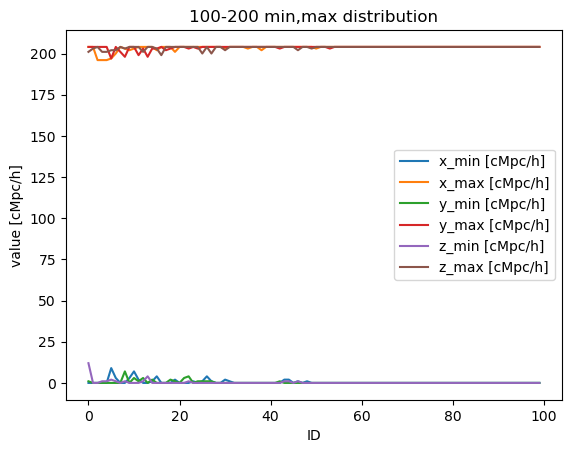

In [11]:
ax = dm_df.plot(y=["x_min [cMpc/h]", "x_max [cMpc/h]", "y_min [cMpc/h]", "y_max [cMpc/h]", "z_min [cMpc/h]", "z_max [cMpc/h]"], title='200-300 min,max distribution')
ax.set_xlabel('ID')
ax.set_ylabel('value [cMpc/h]')

In [16]:
dm_df.to_csv('./snapshot9_PointInfo_200_300.txt', sep = '\t', index=False)

In [17]:
from tabulate import tabulate

# tabulate 패키지를 사용하여 테이블 형식으로 변환
table = tabulate(dm_df.values, headers=dm_df.columns, tablefmt='plain', )

# 텍스트 파일로 저장
with open('./snapshot9_PointInfo_aligned_200_300.txt', 'w') as f:
    f.write(table)